In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
from Algorithms import *
from Plot.UAV_plot import *
import matplotlib.pyplot as plt

In [9]:
RUNS = 100
TIME = 1 #s
VEL = 1 #m/s
T_NOISE_MEAN = 0.0 #m
T_NOISE_STD = 0.2 #m 
ANG_NOISE_MEAN = 0.0 #deg
ANG_NOISE_STD= (4/360) * math.pi #deg
N_DRONES = 5
    
    

In [10]:
def true_dir_x():
    yaw_err = np.random.normal(ANG_NOISE_MEAN, ANG_NOISE_STD)
    pitch_err = np.random.normal(ANG_NOISE_MEAN, ANG_NOISE_STD)
    
    true_dir = np.array([math.cos(yaw_err),math.sin(yaw_err),math.sin(pitch_err)]).T
    
    return true_dir

def true_dir_y():
    yaw_err = np.random.normal(ANG_NOISE_MEAN, ANG_NOISE_STD) + np.pi/2
    pitch_err = np.random.normal(ANG_NOISE_MEAN, ANG_NOISE_STD) 
    
    true_dir = np.array([math.cos(yaw_err),math.sin(yaw_err),math.sin(pitch_err)]).T
    
    return true_dir

def true_dir_z():
    yaw_err = np.random.normal(ANG_NOISE_MEAN, ANG_NOISE_STD) 
    pitch_err = np.random.normal(ANG_NOISE_MEAN, ANG_NOISE_STD) + np.pi/2
    
    true_dir = np.array([math.sin(yaw_err),math.sin(yaw_err),math.sin(pitch_err)]).T
    
    return true_dir



0
1
2
3


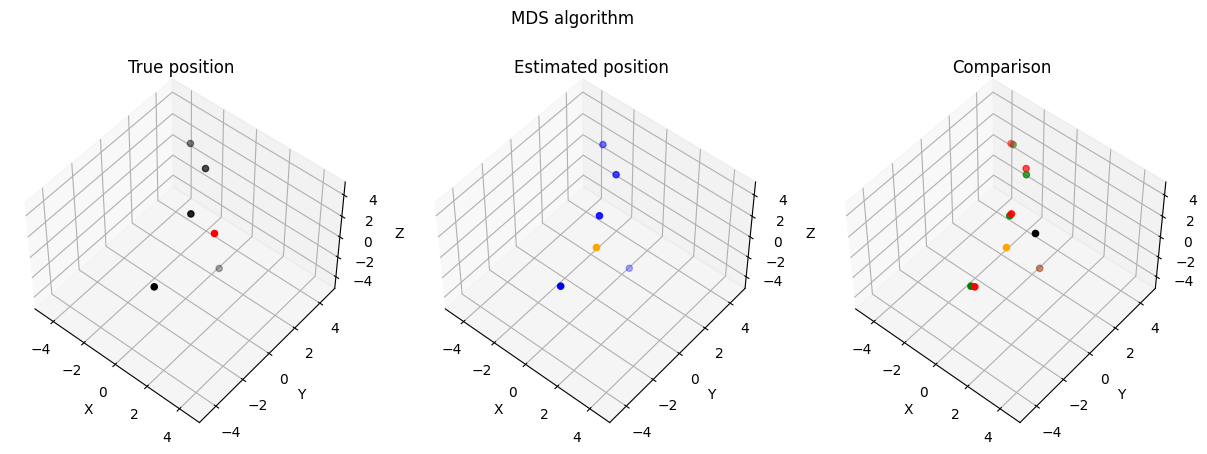

avg squared error MDS:  0.1453826235933055
avg squared error WLP:  0.14741805545007375


In [11]:
step1_coords = [[0],[0],[0]]
step2_coords = [[0],[0],[0]]
step3_coords = [[0],[0],[0]]

alpha = 1
mean, sigma = 0, 0.02
initialize_plot()
#fig = plt.figure(figsize=(12, 12))
#ax = fig.add_subplot(projection='3d')

# Initialize UAVs coordinates, randomly
X = np.random.uniform(low = -5, high=5, size=[3, N_DRONES])


X = np.random.uniform(low = -5, high=5, size=[3, N_DRONES])
for moves in range(4):
    #true_pos = 
    dist = TIME + np.random.normal(T_NOISE_MEAN, T_NOISE_STD) * VEL
    print(moves)
    if moves == 0: # don't move
        ANCHOR1 = np.zeros([3,1])
        ANCHOR1_T = np.zeros([3,1])
        X = np.hstack([ANCHOR1_T,X]) #take measurement with ancor in [0,0,0]
        DM1  = distance_matrix(X) + noise(mean=mean, std=sigma, shape=N_DRONES+1)
    
    if moves == 1: # move along x
        true_pos = dist * true_dir_x()
        step1_coords = np.hstack([step1_coords,np.vstack(true_pos)])
        ANCHOR2 = np.vstack(np.array([1,0,0]))
        ANCHOR2_T = np.vstack(true_pos)
        X = np.hstack([ANCHOR2_T,np.delete(X,0,1)])
        DM2  = distance_matrix(X) + noise(mean=mean, std=sigma, shape=N_DRONES+1)
                    
    elif moves == 2: # move along y
        true_pos += dist * true_dir_y()
        step2_coords = np.hstack([step2_coords,np.vstack(true_pos)])
        ANCHOR3 = np.vstack(np.array([1,1,0]))
        ANCHOR3_T = np.vstack(true_pos)
        X = np.hstack([ANCHOR3_T,np.delete(X,0,1)])
        DM3  = distance_matrix(X) + noise(mean=mean, std=sigma, shape=N_DRONES+1)
    
    elif moves == 3: # move along z
        true_pos += dist * true_dir_z()
        step3_coords = np.hstack([step3_coords,np.vstack(true_pos)])
        ANCHOR4 = np.vstack(np.array([1,1,1]))
        ANCHOR4_T = np.vstack(true_pos)
        X = np.hstack([ANCHOR4_T,np.delete(X,0,1)])
        DM4  = distance_matrix(X) + noise(mean=mean, std=sigma, shape=N_DRONES+1)
        
# Assemble the distance information in one unique matrix
DM = combine_matrices(DM1, DM2, DM3, DM4, ANCHOR1, ANCHOR2, ANCHOR3, ANCHOR4)

# Store the anchor and virtual anchors position into a coordinates array
anchor_pos = np.hstack([ANCHOR1, ANCHOR2, ANCHOR3, ANCHOR4])

# Estimate the fleet coordinates
X_hat_mds = MDS(DM, anchor_pos)
X_hat_ls = LS(DM, anchor_pos)

# Plot the scenario
#plot_uavs(true_coords=X, estimated_coords=X_hat_mds)
plot_uavs(true_coords=X, estimated_coords=X_hat_ls)

mds_sq_err = (X-X_hat_mds)
LS_sq_err = (X-X_hat_ls)

print("avg squared error MDS: ",np.average(mds_sq_err))
print("avg squared error LS: ",np.average(LS_sq_err))

In [15]:
step1_coords = [[0],[0],[0]]
step2_coords = [[0],[0],[0]]
step3_coords = [[0],[0],[0]]

MDS_err = []
LS_err = []

alpha = 1
mean, sigma = 0, 0.02
#fig = plt.figure(figsize=(12, 12))
#ax = fig.add_subplot(projection='3d')

# Initialize UAVs coordinates, randomly
X = np.random.uniform(low = -5, high=5, size=[3, N_DRONES])

for cnt in range(100):
    X = np.random.uniform(low = -5, high=5, size=[3, N_DRONES])
    # X = np.zeros((3,N_DRONES))
    # X[0]=range(1,N_DRONES+1)
    for moves in range(4):
        #true_pos = 
        dist = TIME + np.random.normal(T_NOISE_MEAN, T_NOISE_STD) * VEL
        if moves == 0: # don't move
            ANCHOR1 = np.zeros([3,1])
            ANCHOR1_T = np.zeros([3,1])
            X = np.hstack([ANCHOR1_T,X]) #take measurement with ancor in [0,0,0]
            DM1  = distance_matrix(X) + noise(mean=mean, std=sigma, shape=N_DRONES+1)
        
        if moves == 1: # move along x
            true_pos = dist * true_dir_x()
            step1_coords = np.hstack([step1_coords,np.vstack(true_pos)])
            ANCHOR2 = np.vstack(np.array([1,0,0]))
            ANCHOR2_T = np.vstack(true_pos)
            X = np.hstack([ANCHOR2_T,np.delete(X,0,1)])
            DM2  = distance_matrix(X) + noise(mean=mean, std=sigma, shape=N_DRONES+1)
                        
        elif moves == 2: # move along y
            true_pos += dist * true_dir_y()
            step2_coords = np.hstack([step2_coords,np.vstack(true_pos)])
            ANCHOR3 = np.vstack(np.array([1,1,0]))
            ANCHOR3_T = np.vstack(true_pos)
            X = np.hstack([ANCHOR3_T,np.delete(X,0,1)])
            DM3  = distance_matrix(X) + noise(mean=mean, std=sigma, shape=N_DRONES+1)
        
        elif moves == 3: # move along z
            true_pos += dist * true_dir_z()
            step3_coords = np.hstack([step3_coords,np.vstack(true_pos)])
            ANCHOR4 = np.vstack(np.array([1,1,1]))
            ANCHOR4_T = np.vstack(true_pos)
            X = np.hstack([ANCHOR4_T,np.delete(X,0,1)])
            DM4  = distance_matrix(X) + noise(mean=mean, std=sigma, shape=N_DRONES+1)
            
    # Assemble the distance information in one unique matrix
    DM = combine_matrices(DM1, DM2, DM3, DM4, ANCHOR1, ANCHOR2, ANCHOR3, ANCHOR4)

    # Store the anchor and virtual anchors position into a coordinates array
    anchor_pos = np.hstack([ANCHOR1, ANCHOR2, ANCHOR3, ANCHOR4])

    # Estimate the fleet coordinates
    X_hat_mds = MDS(DM, anchor_pos)
    X_hat_ls = LS(DM, anchor_pos)
    
    
    # compute squared error
    mds_sq_err = np.average((X-X_hat_mds)**2)
    LS_sq_err = np.average((X-X_hat_ls)**2)
    #save error
    MDS_err.append(mds_sq_err)
    LS_err.append(LS_sq_err)
    
print("avg squared error MDS: ",np.average(MDS_err))
print("avg squared error LS: ",np.average(LS_err))
        

avg squared error MDS:  0.2583361056507716
avg squared error WLP:  0.25470859978149696


In [13]:
# Sample data (replace this with your own 3D data)
x = np.hstack([step1_coords[0],step2_coords[0],step3_coords[0]])
y = np.hstack([step1_coords[1],step2_coords[1],step3_coords[1]])
z = np.hstack([step1_coords[2],step2_coords[2],step3_coords[2]])

# Create a trace for the 3D scatter plot
scatter_trace = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=2,
        color='blue',        # You can customize the color of the markers here
        opacity=0.8,
    )
)

# Create the layout for the 3D plot
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='X-axis'),
        yaxis=dict(title='Y-axis'),
        zaxis=dict(title='Z-axis')
    ),
    title='Interactive 3D Scatter Plot'
)

# Create the figure and add the trace and layout
fig = go.Figure(data=[scatter_trace], layout=layout)

# Show the interactive plot
fig.show()